In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loans = pd.read_csv('train.csv')

In [3]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loans.shape

(614, 13)

In [6]:
loans['LoanAmount'] = loans['LoanAmount'].fillna(value=loans.LoanAmount.mean())
loans['Loan_Amount_Term'] = loans['Loan_Amount_Term'].fillna(value=loans.Loan_Amount_Term.mean())
loans['Credit_History'] = loans['Credit_History'].fillna(value=0)

In [7]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.773616
std,6109.041673,2926.248369,84.037468,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


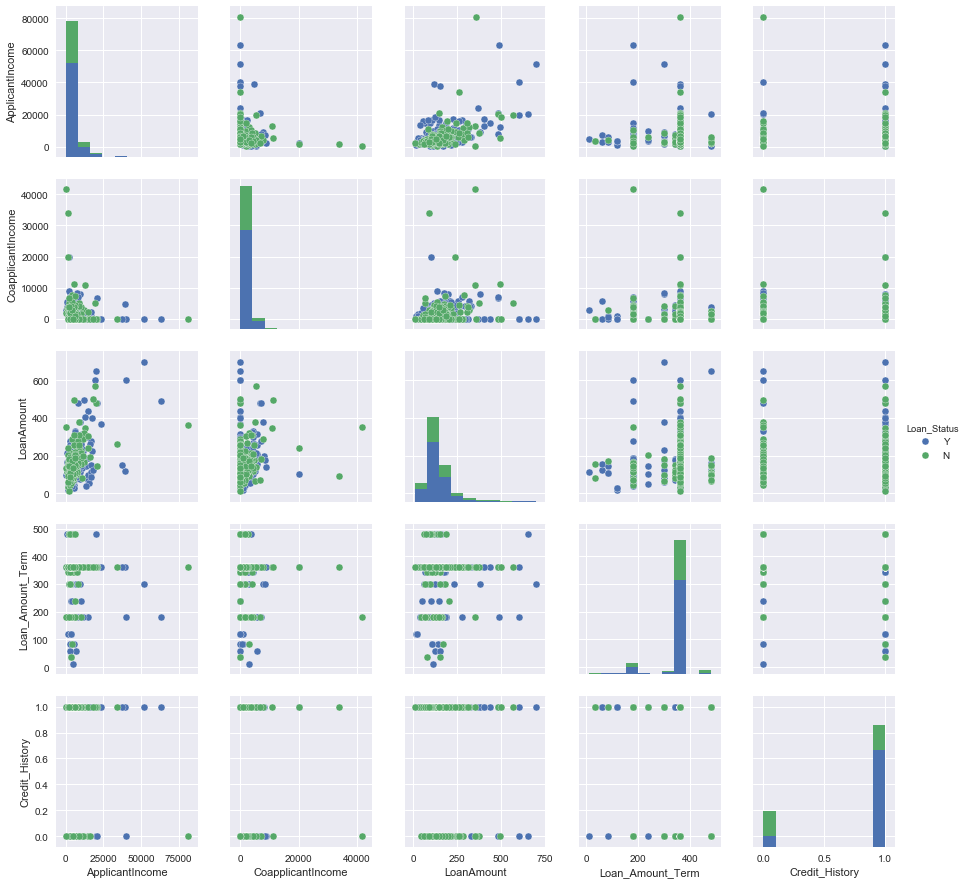

In [8]:
sns.set()

sns.pairplot(data=loans,hue='Loan_Status')

plt.show()

In [9]:
loans[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
loans = loans.dropna()

In [11]:
for col in [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']:
    print(loans[col].value_counts())

Male      453
Female    101
Name: Gender, dtype: int64
Yes    362
No     192
Name: Married, dtype: int64
0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64
Graduate        431
Not Graduate    123
Name: Education, dtype: int64
No     478
Yes     76
Name: Self_Employed, dtype: int64
Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64
Y    382
N    172
Name: Loan_Status, dtype: int64


In [12]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
loans['id_number'] = [int(x[-4:]) for x in loans['Loan_ID']]

In [14]:
loans = loans.drop('Loan_ID',axis=1)

In [15]:
loans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,id_number
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1002
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1003
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1005
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1006
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1008


In [16]:
new_loans = loans.drop('Loan_Status', axis=1)

In [17]:
loan_dummies = pd.get_dummies(new_loans)

In [18]:
loan_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,id_number,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1002,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1003,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1005,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1006,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1008,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(loan_dummies,loans['Loan_Status'])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lreg = LogisticRegression()

In [32]:
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_predicted = lreg.predict(loan_dummies)

In [34]:
lreg.score(X_test, y_test)

0.69064748201438853

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier(n_estimators=200)

In [40]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rf_model.score(X_test, y_test)

0.6690647482014388

In [42]:
from sklearn.neighbors import KNeighborsClassifier

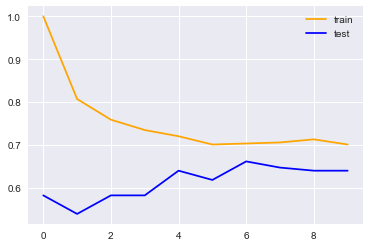

In [47]:
test_scores = []

train_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(train_scores,color='orange', label="train")
plt.plot(test_scores,color='blue', label="test")

plt.legend()

plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors=13)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [50]:
knn.score(X_test,y_test)

0.66187050359712229